In [1]:
import numpy as np
import time, sys
from matplotlib import pyplot

In [8]:
nx = 101
dx = 2 / (nx - 1)
nt = 25     #nt is the number of timesteps we want to calculate
dt = 0.025  #dt is the amount of time each timestep covers (delta t)
c = 1       #assume wavespeed of c = 1

In [9]:
u = np.ones(nx)
u[int(0.5 / dx) : int(1/dx + 1)] = 2

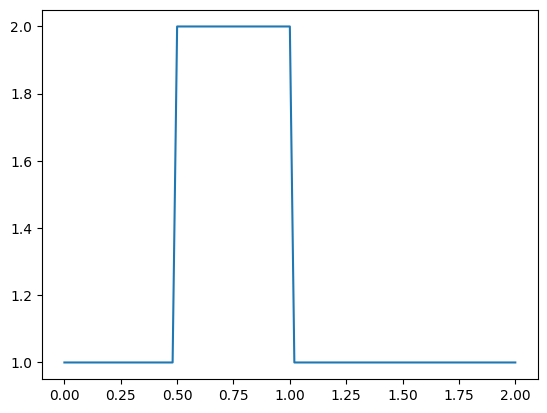

In [10]:
pyplot.plot(np.linspace(0, 2, nx), u);

In [11]:
un = np.ones(nx)

for t in range(0, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])

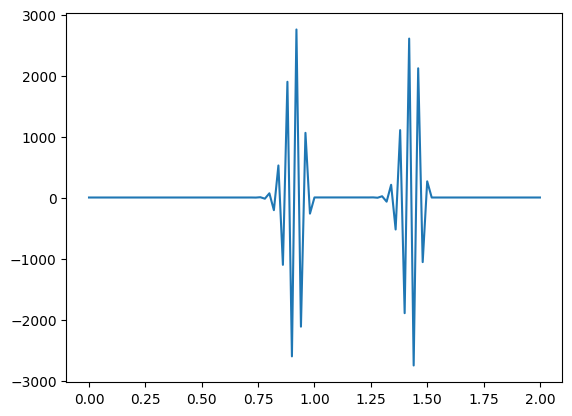

In [12]:
pyplot.plot(np.linspace(0, 2, nx), u)

Неявная схема для конечных разостей. В отличие от явной схемы используется разница назад а не вперед

In [14]:
nx = 101
dx = 2 / (nx - 1)
nt = 10
dt = 0.025
c = 1
CFL = c * dt / dx
print(CFL)

1.25


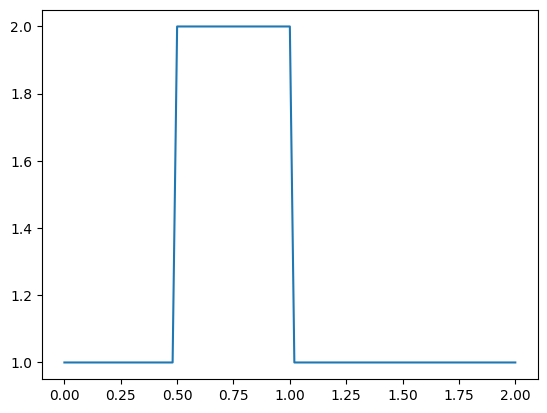

In [15]:
u = np.ones(nx)
#initial condition
u[int(0.5 / dx) : int(1 / dx + 1)] = 2
pyplot.plot(np.linspace(0, 2, nx), u)

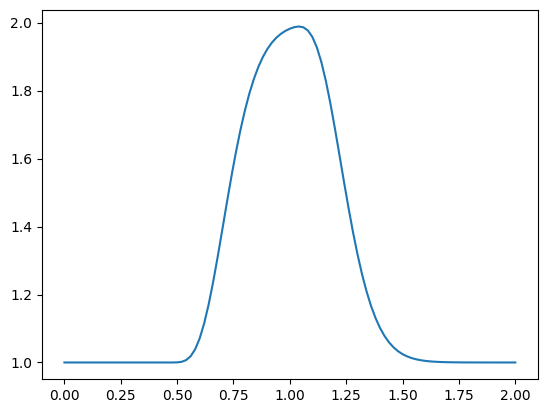

In [16]:
# Решение при помози встроенного в numpy решателя СЛАУ

A = np.eye(nx) * (1 + CFL)
for i in range(1, nx):
    A[i, i-1] = -CFL
# Значение скорости в нулевой точке X будет соответсвовать скорости на предыдущем шаге по времени 
A[0, 0] = 1
for i in range(0, nt):
    u = np.linalg.solve(A, u)

pyplot.plot(np.linspace(0, 2, nx), u)

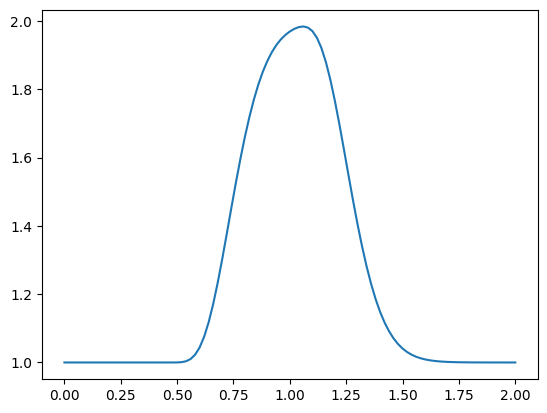

In [17]:
# Метод прогонки для трехдиагональных матриц
A = np.eye(nx) * (1 + CFL)
for i in range(1, nx):
    A[i, i-1] = -CFL
# Значение скорости в нулевой точке X будет соответсвовать скорости на предыдущем шаге по времени 
A[0, 0] = 1

# Модельное уравнение представляется в виде
# x_i = C1 * x_i+1 + C2

C1 = [0]
C2 = [u[0] / A[0, 0]]
for i in range(nt):
    for j in range(1, nx):
        a = A[j, j-1]
        b = A[j, j]
        if j == nx-1:
            c = 0
        else:
            c = A[j, j+1]
        C1.append(-c / (b + a * C1[j-1]))
        C2.append((u[j] - a * C2[j-1]) / (b + a * C1[j-1])) 
    
    u[-1] = C2[-1]
    for j in range(nx-2, -1, -1):
        u[j] = C1[j]*u[j+1] + C2[j]

pyplot.plot(np.linspace(0, 2, nx), u)